# Class 0 - Two-port Problem

## Agenda
- Problem Description
- Problem Implementation
- Wrap-Up

## Problem Description

- Take the network of next Figure where two-port ($e,r$) circuit is represented. Assume that we have data on both voltage and current magnitudes in each port: $V_e, I_e, V_r, I_r$. To discover the function that maps voltages into currents, i_e, $h:i=h(v)$, with $i=(I_e;-I_r)$ and $v=(V_e:V_r)$.

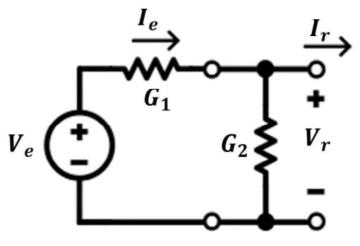

### Problem Description - Linear Combination

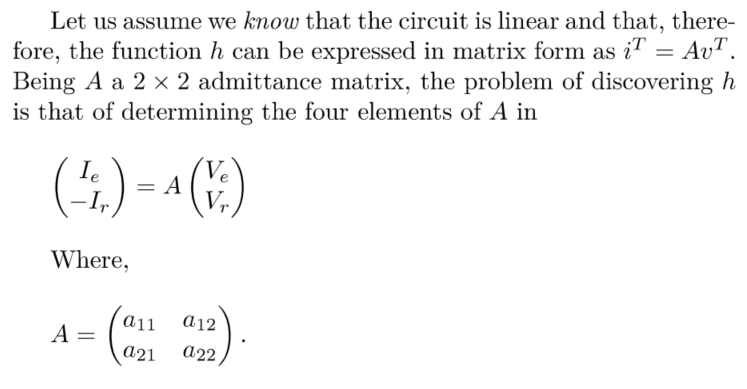

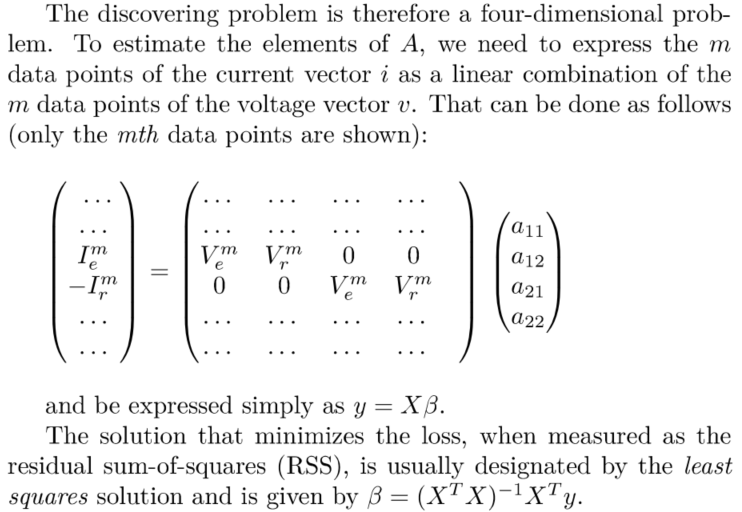

### Problem Description - Linear Reciprocal
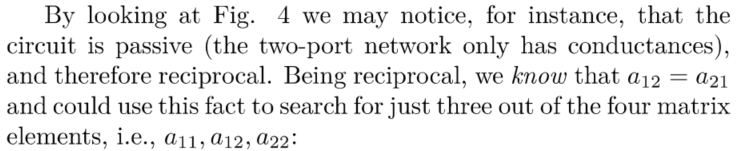

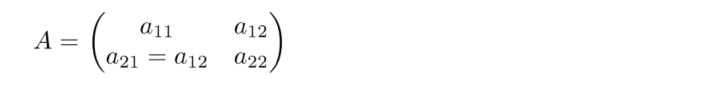

### Problem Description - Linear Kirchhoff
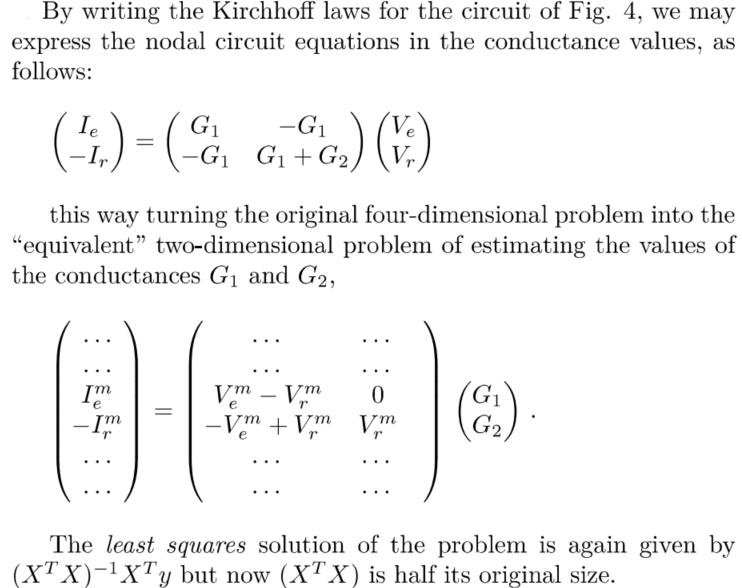

## Code

Import Python Libraries

In [7]:
import pandas as pd
import numpy as np
from numpy.random import randint   # To random values in the phases
from numpy.random import random   # To random values in the phases
import matplotlib.pyplot as plt


C:\Users\berna\AppData\Local\Temp\ipykernel_17276\1005790576.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Parameters (It is possible to change to test different input data)

In [8]:
g1=10           #Conductance G1
g2=1            #Conductance G2

m=4             # m data points
n=1000          # Number of simulations
eps_error=0.01  # Error with variance 0.01


Generate $(v,i)$ data with error $eps=N(0.01)$

In [9]:
def UI(g1, g2, eps_error):                          # Definition of voltages and currents
    i=np.random.rand(2,1)                           # Obtain random currents
    i[1,0]=-i[1,0]                                  # Invert the sinal of the second current (Ir)
    eps=np.random.normal(1, size=[2,1])*eps_error   #Error with normal distribution
    mat_g=np.matrix([[g1, -1*g1],[-1*g1, g1+g2]])   #Definition of conductance matrix 
    v=np.linalg.inv(mat_g)*(i+eps)                  #Compute the voltages based on the random currents with errors
    return i,v


In [31]:
# create a 1000 * 4 matrix and with 2*n lines and 4 columns
data = np.zeros((2*n, 4))

#create a 1000 lines with 1 column 
i_s = np.zeros((2*n, 1))

#create a 4 lines and 1 column
beta = np.zeros((4, 1))

for kk in range(n):                  # Run n samples  

    i,v = UI(g1, g2, eps_error)  
    #concatenate all i´s in i_s
    i_s[2*kk:2*kk+2] = i
    v=v.reshape(2,)
    

    data[2*kk, 0:2] = v
    data[2*kk + 1, 2:4]  = v         # voltage 1
    


    
                                #print(i,v) #Definition of voltages and currents 
        
#calculate the transpose of data times data and inverse it, then multiply by the transpose of data and i_s
beta = np.linalg.inv(data.T @ data) @ data.T @ i_s

print(beta)


[[  9.83753183]
 [ -9.82938381]
 [-10.1764017 ]
 [ 11.1842706 ]]


In [32]:
# create a 1000 * 4 matrix and with 2*n lines and 4 columns
data = np.zeros((2*n, 3))

#create a 1000 lines with 1 column 
i_s = np.zeros((2*n, 1))

#create a 4 lines and 1 column
beta = np.zeros((3, 1))

for kk in range(n):                  # Run n samples  

    i,v = UI(g1, g2, eps_error)  
    #concatenate all i´s in i_s
    i_s[2*kk:2*kk+2] = i
    v=v.reshape(2,)
    

    data[2*kk, 0:2] = v
    data[2*kk + 1, 1:3]  = v         # voltage 1
    


    
                                #print(i,v) #Definition of voltages and currents 
        
#calculate the transpose of data times data and inverse it, then multiply by the transpose of data and i_s
beta = np.linalg.inv(data.T @ data) @ data.T @ i_s

print(beta)

[[  9.99855177]
 [-10.00332383]
 [ 11.00157023]]


In [33]:
# create a 1000 * 4 matrix and with 2*n lines and 4 columns
data = np.zeros((2*n, 2))

#create a 1000 lines with 1 column 
i_s = np.zeros((2*n, 1))

#create a 4 lines and 1 column
beta = np.zeros((2, 1))

for kk in range(n):                  # Run n samples  

    i,v = UI(g1, g2, eps_error)  
    #concatenate all i´s in i_s
    i_s[2*kk:2*kk+2] = i
    v=v.reshape(2,)
    

    data[2*kk, 0] = v[0,0]- v[0,1]
    data[2*kk + 1, 0]  = -v[0,0]+v[0,1]
    data[2*kk + 1, 1]  =  v[0,1]   
    


    
                                #print(i,v) #Definition of voltages and currents 
        
#calculate the transpose of data times data and inverse it, then multiply by the transpose of data and i_s
beta = np.linalg.inv(data.T @ data) @ data.T @ i_s

print(beta)

[[9.99399113]
 [0.99958611]]


## Problem guide
### Linear
#### 1º Define matrix X_linear
### 2º Define matrix y
#### 3º Define beta_linear
#### 4º Compute the error_linear of Linear approach

### Reciprocal
#### 1º Define matrix X_Reciprocal
#### 2º Define matrix y
#### 3º Define beta_reciprocal
#### 4º Compute the error_Reciprocal of Reciprocal approach

### Kirchhoff
#### 1º Define matrix X_Kirchhoff
#### 2º Define matrix y
#### 3º Define beta_Kirchhoff
#### 4º Compute the error_Kirchhoff of Kirchhoff approach


Plots

In [5]:
#data=[error_linear, error_Rec, error_Kir]
#fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
#ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
#bp = ax.boxplot(data)
 
# show plot
#plt.show()